In [2]:
import pandas as pd
#טעינת קובץ הדאטה-סט
originalDF = pd.read_csv('/content/diabetes_prediction_dataset.csv')

In [3]:
originalDF.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
originalDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
originalDF.describe(include="all")

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000,100000.000000,100000.00000,100000.000000,100000,100000.000000,100000.000000,100000.000000,100000.000000
unique,3,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN
top,Female,NaN,NaN,NaN,No Info,NaN,NaN,NaN,NaN
freq,58552,NaN,NaN,NaN,35816,NaN,NaN,NaN,NaN
mean,NaN,41.885856,0.07485,0.039420,NaN,27.320767,5.527507,138.058060,0.085000
std,NaN,22.516840,0.26315,0.194593,NaN,6.636783,1.070672,40.708136,0.278883
min,NaN,0.080000,0.00000,0.000000,NaN,10.010000,3.500000,80.000000,0.000000
25%,NaN,24.000000,0.00000,0.000000,NaN,23.630000,4.800000,100.000000,0.000000
50%,NaN,43.000000,0.00000,0.000000,NaN,27.320000,5.800000,140.000000,0.000000
75%,NaN,60.000000,0.00000,0.000000,NaN,29.580000,6.200000,159.000000,0.000000


In [6]:
# כל שורה מתארת אדם, מה גילו, מה הרקע הרפואי שלו, והמשתנה המנובא היא האם הוא חולה סכרת או לא.

In [7]:
# שאלות תיאורטיות:
#1:
#למידה מונחית היא תהליך שבו המודל לומד על סמך נתוני עבר הכוללים "תשובה נכונה" (משתנה מנובא), במטרה לבנות פונקציה שתחזה את התוצאה עבור נתונים חדשים

In [8]:
#2:
#דאטה עם תוויות מספק למודל את ה"תשובה הנכונה" עבור דוגמאות מהעבר. כך הוא לומד פונקציה המקשרת בין המאפיינים לתוצאה, ומסוגל להצמיד תווית נכונה למידע חדש

In [9]:
#3:
# Feature הוא מאפיין או תכונה של המידע המשמש כקלט
# Target הוא התווית או התוצאה הנכונה שאותה המודל שואף לחזות

In [10]:
#4:
#הבנת ההקשר חיונית כדי לוודא שקיימת תבנית ללמידה, לבחור מאפיינים רלוונטיים ולהתאים את ערכי הסף ומדדי הביצוע למשמעות המעשית של טעויות בחיזוי

In [11]:
#חלק 2 - ניתוח חקרני

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. הגדרת משתנים וסוגים
target = 'diabetes'
X = originalDF.drop(target, axis=1)

# הפרדה אוטומטית לפי סוגי נתונים
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

print("Numeric Features:", numeric_features)
print("Categorical Features:", categorical_features)

Numeric Features: ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level']
Categorical Features: ['gender', 'smoking_history']


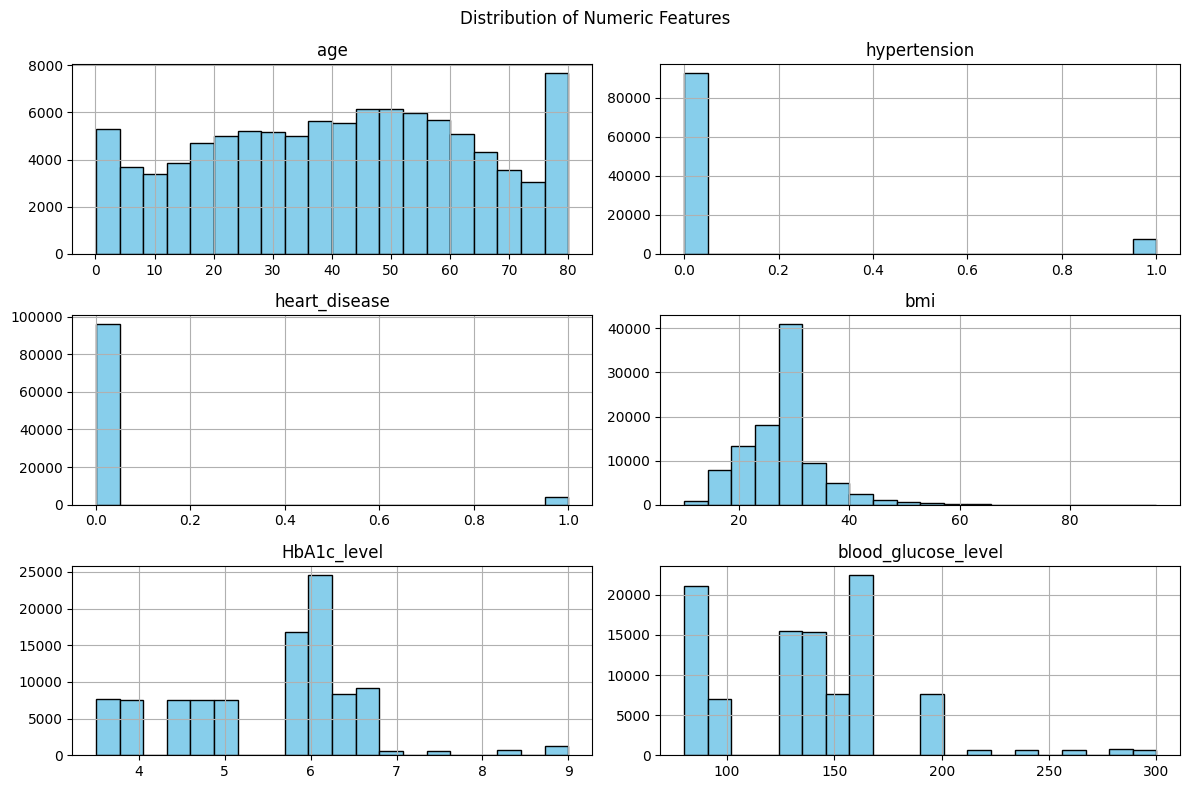

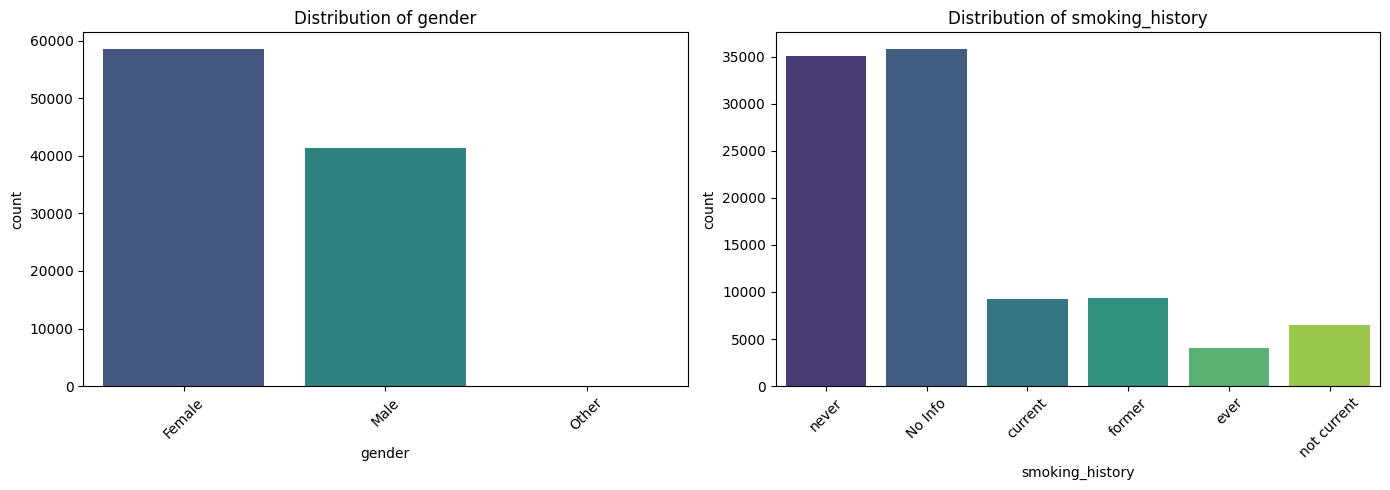

In [13]:
# 2. ניתוח התפלגויות
# משתנים נומריים
originalDF[numeric_features].hist(bins=20, figsize=(12, 8), color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Numeric Features')
plt.tight_layout()
plt.show()

# משתנים קטגוריאליים
plt.figure(figsize=(14, 5))
for i, col in enumerate(categorical_features):
    plt.subplot(1, len(categorical_features), i+1)
    sns.countplot(data=originalDF, x=col, palette='viridis',hue=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipython-input-1329757157.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=target, data=originalDF, palette="Set2")


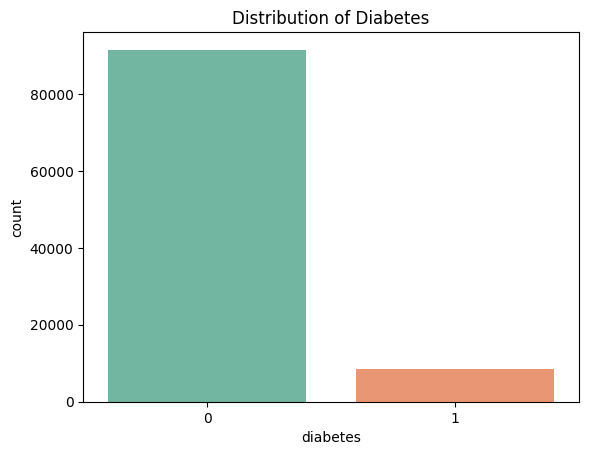

In [14]:
# 3. בדיקת איזון מחלקות
sns.countplot(x=target, data=originalDF, palette="Set2")
plt.title("Distribution of Diabetes")
plt.show()

In [15]:
# 4. איתור וטיפול בערכים חסרים
# בדיקת NaN רגיל
print("\nMissing Values (NaN):")
print(originalDF.isnull().sum())


Missing Values (NaN):
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


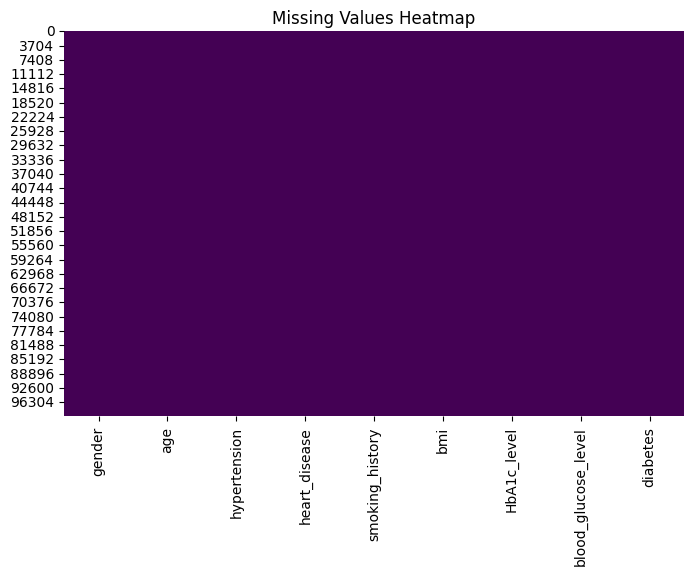

In [16]:
# ויזואליזציה של החוסרים
plt.figure(figsize=(8, 5))
sns.heatmap(originalDF.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [17]:
#שאלות תיאורטיות

In [18]:
#1:
#ניתוח נתונים ראשוני הוא שלב קריטי להבנת איכות המידע וזיהוי תבניות אמיתיות,
#כי ללא הכנה נכונה המודל עלול ללמוד דפוסים שגויים או להיכשל בשל רעש וערכים חסרים

In [19]:
#2:
# דילוג על EDA עלול לגרום למודל ללמוד דפוסים שגויים ורועשים,
#להיכשל בשל בעיות טכניות בנתונים או להציג דיוק גבוה מטעה שאינו תקף במציאות

In [20]:
#3:
#חוסר איזון מתרחש כאשר מחלקה אחת גדולה משמעותית מהשנייה (למשל 95% בריאים מול 5% חולים),
#מה שהופך את מדד הדיוק (Accuracy) למטעה ומחייב שימוש במדדים כמו Recall כדי לוודא שהמודל לא מפספס את מחלקת המיעוט הקריטית

In [21]:
# חלק 3 — ניתוח ערכים חסרים

In [22]:
#הערכים החסרים היחידים הם בעמודה הקשורה לעישון, והם מהווים כ 35%~ מהדאטה
#במקרה אחר, הייתי מעדיף למחוק לגמרי את העמודה
#או למלא את החוסרים בערך ה״שכיח״ ביותר
#אבל מילוי הערך השכיח פה ייצור הטיה חמורה שתגרום ל 71% מהנתונים להיות ״לא עישנו מעולם״
#ומכיוון שבמקרה הזה עישון הוא נתון קריטי לחיזוי,
#לכן במקרה הזה אני אשאיר את הקטגוריה ״no info" כקטגוריה בפני עצמה.

In [23]:
#שאלות תיאורטיות

In [24]:
#1:
#דאטה מהעולם האמיתי מכיל ערכים חסרים כיוון שמידע עשוי להיות פשוט לא ידוע,
#או לנבוע מרעש וטעויות מדידה במהלך איסוף הנתונים

In [25]:
#2:
#תהליך של מילוי ערכים חסרים בנתונים בצורה מבוקרת, למשל באמצעות ממוצע, חציון או הערך השכיח,
# כדי לשמר את המידע והתפלגות הנתונים במקום למחוק שורות שלמות

In [26]:
#3:
#מחיקת שורות גורמת לאובדן מידע יקר ועלולה להשאיר דאטה-סט קטן מדי שאינו מייצג את האוכלוסייה האמיתית

In [27]:
#4:
#הטיפול המומלץ הוא השלמת ערכים (Imputation) באמצעות ממוצע, חציון או הערך השכיח כאשר היקף החוסר קטן,
#אך כאשר חסר חלק ניכר מהמידע (למשל מעל 30%),
#והעמודה אינה משמעותית לחיזוי נשקול את מחיקת העמודה כולה כדי להימנע מהטיות

In [28]:
#🎯 חלק 4 — הפרדת Features ו־Target

In [29]:
# 1. הגדרת ה-Features
X = originalDF.drop('diabetes', axis=1)

In [30]:
# 2. הגדרת ה-Target
y = originalDF['diabetes']

In [31]:
# 3. בדיקה שההפרדה הצליחה
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (100000, 8)
Shape of y: (100000,)


In [32]:
# 4. בדיקת ה-Target (האם דרוש קידוד?)
print("\nUnique values in Target:", y.unique())
# הערך הוא כבר 0 ו-1, לכן אין צורך בקידוד ל-Target.


Unique values in Target: [0 1]


In [33]:
#שאלות תיאורטיות

In [34]:
#1:
#חובה להפריד ביניהם כדי שהמודל יוכל ללמוד את הפונקציה המתמטית שממפה את נתוני הקלט לתוצאה הרצויה,
#כך שבעתיד יוכל לחזות את הטרגט על סמך הפיצ׳רס בלבד

In [35]:
#2:
#"למידה" במודל היא תהליך של שיפור הביצועים במשימה מסוימת המבוסס על ניסיון (נתונים),
#שמטרתו לזהות תבניות או למצוא פונקציה מתמטית הממפה את המאפיינים לתוצאה הרצויה

In [36]:
#3:
#בחרתי להשאיר את כל העמודות מכיוון והן כולן רלוונטיות לחיזוי

In [37]:
#4:
#בלמידה מונחית (Supervised) המודל לומד מנתונים הכוללים "תשובות נכונות" (תגיות) כדי לחזות תוצאות עתידיות,
#בעוד שבלמידה לא מונחית (Unsupervised) הנתונים מגיעים ללא תוויות והמודל מנסה לגלות בהם תבניות או לקבץ אותם לקבוצות באופן עצמאי

In [38]:
#✂️ חלק 5 — חלוקת Train / Test

In [39]:
from sklearn.model_selection import train_test_split

# random_state=42: מבטיח שהתוצאות יהיו ניתנות לשחזור
# stratify=y: שומר על יחס זהה של חולים/בריאים בשתי הקבוצות
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3, #30%
    random_state=42,
    stratify=y
)

# בדיקה שהחלוקה הצליחה
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (70000, 8)
Test set shape: (30000, 8)


In [40]:
#שאלות תיאורטיות

In [41]:
#1:
#הערכה על נתוני האימון בודקת רק את יכולת הזיכרון של המודל ולא את יכולת ההכללה (Generalization) שלו על נתונים חדשים,
#מה שמוביל להערכה אופטימית ושקרית לגבי ביצועיו במציאות

In [42]:
#2:
#Overfitting (התאמת יתר) הוא מצב שבו המודל "משנן" את נתוני האימון ואת הרעש הספציפי שבהם במקום ללמוד את התבנית הכללית,
#מה שמוביל לביצועים גרועים בחיזוי נתונים חדשים

In [43]:
#3:
#דליפת מידע (Data Leakage) מתרחשת כאשר מידע מסט הבדיקה (Test) זולג ומשפיע על תהליך האימון (Train),
#מה שגורם למודל "להכיר את התשובות" ולהציג ביצועים אופטימיים ושקריים שאינם משקפים את המציאות

In [44]:
#4:
#חלוקה סטרטיפית מבטיחה שהיחס בין המחלקות (התפלגות ה-Target) יישמר זהה גם בסט האימון וגם בסט הבדיקה,
#וזה קריטי במיוחד בנתונים לא מאוזנים כדי למנוע הטיה בתוצאות

In [45]:
#🛠️ חלק 6 — בניית Pipeline לעיבוד נתונים

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

#נוציא את עמודת smoking history מ - categorical כדי להתאים לו pipeline לפי ההחלטה בחלק 3
smoking_feature = ['smoking_history']
#פה נעבוד עם שאר העמודות הקטגוריאליות
categorical_features.remove('smoking_history')

# 1. Pipeline למספרים
numeric_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# 2. Pipeline לקטגוריות
categorical_pipeline = Pipeline(steps=[
    #בהתאם להחלטה בחלק 3:
    # כל חוסר יהפוך ל-'No Info' במקום לערך השכיח עבור עמודת המיסטוריית המעשנים
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])
#pipeline ל- smoking history:
smoking_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='No Info')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ])


# 3. איחוד הכל ל-ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_pipeline, numeric_features),
    ("cat", categorical_pipeline, categorical_features),
    ('smoking', smoking_pipeline, smoking_feature)
])

# Fit רק על ה-Train
X_train_processed = preprocessor.fit_transform(X_train)
# Transform ל-Test
X_test_processed = preprocessor.transform(X_test)

print("Shape of processed Train:", X_train_processed.shape)

Shape of processed Train: (70000, 15)


In [47]:
#שאלות תיאורטיות

In [48]:
#1:
#המודלים הם אלגוריתמים מתמטיים המבצעים חישובים על וקטורים,
#ולכן המחשב אינו יכול להבין טקסט או משמעות אנושית אלא רק לעבד נתונים מספריים

In [49]:
#2:
#Scaling קריטי בעיקר למודלים המבוססים על חישובי מרחקים (כמו KNN ו-K-Means) או משקלים (כמו רגרסיה ו-SVM),
#כיוון שבלי scaling, משתנים עם ערכים מספריים גדולים (כמו משכורת) "ישתלטו" על החישוב לעומת משתנים קטנים (כמו גיל),
#בעוד שמודלים כמו עצי החלטה אינם רגישים לכך

In [50]:
#3:
#ביצוע fit על נתוני האימון בלבד הכרחי למניעת דליפת מידע (Data Leakage), שכן חישוב פרמטרים גם על נתוני הבדיקה גורם למודל "להכיר את העתיד",
#ולהציג ביצועים אופטימיים ושקריים

In [51]:
#🔄 חלק 7 — אימון מודלים (מספר מודלים)

In [52]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd

# רשימה לשמירת התוצאות להשוואה בסוף
results = []

In [53]:
# 1. הגדרת המילון עם התיקון ל-Pipeline (הוספת classifier__)
models_and_params = {
    "Logistic Regression": {
        "model": LogisticRegression(max_iter=2000),
        "params": {
            "C": [0.01, 0.1, 1, 10]  # שים לב לקידומת
        }
    },
    "KNN": {
        "model": KNeighborsClassifier(),
        "params": {
            "n_neighbors": [3, 7, 9]
        }
    },
    "Naive Bayes": {
        "model": GaussianNB(),
        "params": {}  # לרוב אין פרמטרים לכוונן ב-GaussianNB בסיסי
    },
    "Decision Tree": {
        "model": DecisionTreeClassifier(random_state=42),
        "params": {
            "max_depth": [None, 3, 5, 10],
            "min_samples_split": [2, 5, 10]
        }
    }
}

In [54]:
# 2. לולאת האימון (Loop over models)
results = []
best_models = {}

for name, config in models_and_params.items():

    print(f"Training {name}...")

    # הגדרת GridSearch
    grid = GridSearchCV(
        estimator=config['model'],
        param_grid=config['params'],
        cv=5,
        scoring='accuracy',
        n_jobs=-1 # הרצה במקביל להאצת התהליך
    )

    # אימון
    grid.fit(X_train_processed, y_train)

    best_models[name] = grid.best_estimator_

    # שמירת התוצאות
    results.append({
        'Model': name,
        'Best Params': grid.best_params_,
        'Best Accuracy': grid.best_score_
    })

Training Logistic Regression...
Training KNN...
Training Naive Bayes...
Training Decision Tree...


In [55]:
#שאלות תאורטיות

In [56]:
#1:
#"לאמן מודל" משמעותו להריץ אלגוריתם הלומד ומוצא את הפונקציה המתמטית או הפרמטרים שמקשרים בצורה הטובה ביותר בין המאפיינים
 #(Features) לבין התוצאה הרצויה (Target) על סמך נתוני העבר

In [57]:
#2:
#hyperparameter הוא משתנה שנקבע מראש על ידי המשתמש לפני תחילת תהליך האימון
#כמו מספר השכנים ב-KNN או מספר האשכולות ב-K-Means

In [58]:
#3:
#מודלים שונים מתבססים על הנחות מתמטיות ואלגוריתמים שונים כדי ללמוד
#ולכן כל אחד מהם מייצר "גבול החלטה" שונה לאותם הנתונים בדיוק

In [59]:
#🏆 חלק 8 — השוואת מודלים ובחירת המודל הטוב ביותר

In [60]:
#הצגת טבלת ההשוואה
print("\n=== Model Comparison (Cross-Validation) ===")
results_df = pd.DataFrame(results).sort_values(by='Best Accuracy', ascending=False)
display(results_df)


=== Model Comparison (Cross-Validation) ===


,Model,Best Params,Best Accuracy
3,Decision Tree,"{'max_depth': 3, 'min_samples_split': 2}",0.971643
1,KNN,{'n_neighbors': 9},0.961700
0,Logistic Regression,{'C': 0.1},0.960271
2,Naive Bayes,{},0.638229


In [61]:
#בחירת המודל הטוב ביותר:
best_model_name = results_df.iloc[0]["Model"]
best_model = best_models[best_model_name]

print(f"\n🏆 Best Model Selected: {best_model_name}")


🏆 Best Model Selected: Decision Tree


In [62]:
#📊 חלק 9 — הערכת המודל על Test Data

In [63]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = best_model.predict(X_test_processed)
#חישוב Accuracy:
print("\nFinal Test Accuracy:", accuracy_score(y_test, y_pred))
#מטריצת בלבול:
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
#Precision / Recall / F1:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Final Test Accuracy: 0.9724

Confusion Matrix:
 [[27450     0]
 [  828  1722]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99     27450
           1       1.00      0.68      0.81      2550

    accuracy                           0.97     30000
   macro avg       0.99      0.84      0.90     30000
weighted avg       0.97      0.97      0.97     30000



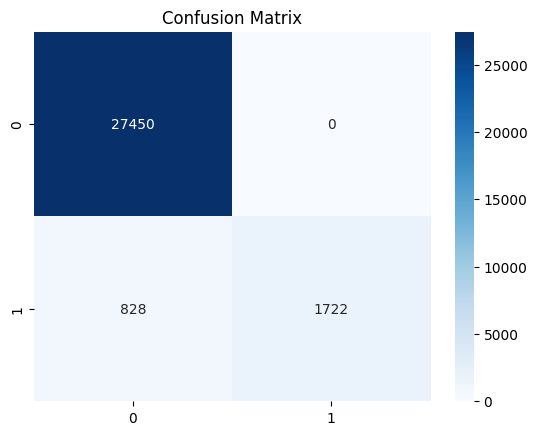

In [64]:
#ויזואליציה
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.show()

In [65]:
#שאלות תיאורטיות

In [66]:
#1:
#מדד ה-Accuracy עלול להטעות בנתונים לא מאוזנים,
#מכיוון שמודל יכול פשוט לנחש תמיד את הרוב (למשל, לקבוע שכולם בריאים) ולקבל ציון גבוה מאוד,
#בעוד שבפועל הוא מפספס לחלוטין את כל המקרים החשובים (כמו החולים)

In [67]:
#2:
#False Positive (FP) הוא מצב של "אזעקת שווא" שבו המודל מזהה בטעות דוגמה שלילית כחיובית,
#כלומר ונזהה בריא כ-חולה
#ואילו False Negative (FN) הוא מצב של "פספוס" שבו המודל מסווג דוגמה חיובית כשלילית
#כלומר נזהה חולה כ-בריא

In [68]:
#3:
#Recall חשוב יותר כאשר ה"מחיר" של פספוס מקרה חיובי (False Negative) הוא גבוה ומסוכן,
#כמו באבחון סכרת או במערכות בטיחות,שם עדיף לקבל אזעקת שווא מאשר לא לזהות סכנה אמיתית

In [69]:
#🔮 חלק 10 — חיזוי על נתונים חדשים - בונוס

In [70]:
# 1. יצירת דאטה-פריים עם נתונים חדשים (המצאת מטופלים)
new_patients_data = [
    # מטופל 1: בחור צעיר ובריא (Low Risk)
    {
        'gender': 'Male',
        'age': 25,
        'hypertension': 0,
        'heart_disease': 0,
        'smoking_history': 'never',
        'bmi': 22.5,
        'HbA1c_level': 5.0,
        'blood_glucose_level': 90
    },
    # מטופל 2: אישה מבוגרת בסיכון גבוה (High Risk)
    {
        'gender': 'Female',
        'age': 65,
        'hypertension': 1,
        'heart_disease': 1,
        'smoking_history': 'current',
        'bmi': 35.2,
        'HbA1c_level': 8.5,
        'blood_glucose_level': 220
    },
    # מטופל 3: מקרה שבודק את ה-Pipeline שלנו (חסר מידע על עישון)
    {
        'gender': 'Male',
        'age': 45,
        'hypertension': 0,
        'heart_disease': 0,
        'smoking_history': None, # שים לב! אנחנו שולחים "ריק" (None)
        'bmi': 28.0,
        'HbA1c_level': 6.2,
        'blood_glucose_level': 145
    }
]

In [71]:
# המרה ל-DataFrame
new_patients_df = pd.DataFrame(new_patients_data)

print("New Patients Data")
display(new_patients_df)

new_patients_data_processed = preprocessor.transform(new_patients_df)

New Patients Data


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,Male,25,0,0,never,22.5,5.0,90
1,Female,65,1,1,current,35.2,8.5,220
2,Male,45,0,0,None,28.0,6.2,145


In [72]:
# 2. ביצוע חיזוי (Prediction)
predictions = best_model.predict(new_patients_data_processed)
probabilities = best_model.predict_proba(new_patients_data_processed)

In [73]:
# 3. הצגת התוצאות
print("\nPrediction Results:")
for i, patient in new_patients_df.iterrows():
    pred_class = "Diabetic (1)" if predictions[i] == 1 else "Healthy (0)"
    prob_percent = probabilities[i][1] * 100 # הסיכוי להיות חולה באחוזים (העמודה השנייה)

    print(f"Patient #{i+1}:")
    print(f"  Prediction: {pred_class}")
    print(f"  Probability of Diabetes: {prob_percent:.2f}%")


Prediction Results:
Patient #1:
  Prediction: Healthy (0)
  Probability of Diabetes: 1.23%
Patient #2:
  Prediction: Diabetic (1)
  Probability of Diabetes: 100.00%
Patient #3:
  Prediction: Healthy (0)
  Probability of Diabetes: 1.23%


In [74]:
#שאלות תיאורטיות:

In [75]:
#1:
#חייבים להשתמש באותו Preprocessor כדי להבטיח שהנתונים החדשים יוצגו למודל בדיוק באותו קנה מידה וייצוג שעליו הוא התאמן,
#אחרת התחזיות יהיו שגויות וחסרות משמעות

In [76]:
#2:
#ביצוע fit מחדש מחשב את הפרמטרים (כמו ממוצע וסטיית תקן)
#לפי הנתונים החדשים במקום להשתמש בערכים שעליהם המודל התאמן,
#מה שגורם לעיוות הנתונים ולזליגת מידע (Data Leakage) המסלפת את תוצאות המודל

In [77]:
#3:
#הסתברות חיזוי היא ציון מספרי בין 0 ל-1,
#המייצג את מידת הביטחון של המודל בכך שדוגמה מסוימת שייכת למחלקה החיובית (למשל, הסיכוי שאדם אכן חולה סכרת)

In [78]:
#4:
#ביטחון החיזוי מאפשר לנהל סיכונים ולתעדף משאבים בצורה מושכלת,
#על ידי קביעת ספי פעולה דינמיים (כגון טיפול מיידי למקרים בסיכון גבוה לעומת מעקב למקרים גבוליים)
#בהתאם לרמת הוודאות שהמודל מספק.

In [79]:
#🧠 חלק 11 — רפלקציה מסכמת

In [80]:
#1:
#החלק המאתגר ביותר בפרויקט היה להחליט איך להתייחס לערכים חסרים
#בעמודת smoking history
#הדילמה העיקרית הייתה כיצד לטפל בעמודת smoking_history, שבה כ-35% מהנתונים היו חסרים (No Info). מצד אחד,
#הפתרון הטכני הקל היה למלא את החסר בערך השכיח (Most Frequent). מצד שני, הבנתי שברפואה,
#'חוסר מידע' הוא מידע בפני עצמו, ומילוי מלאכותי ייצור הטיה (Bias) ויעוות את המציאות.
#הפתרון שבחרתי – בניית Pipeline מפוצל שמטפל אחרת בעישון (שמירה על הקטגוריה) ואחרת במגדר (השלמה לפי השכיח)

In [81]:
#2:
#לפי מה שלמדנו, הטעויות הנפוצות שקיימות בפרוייקטי ml הן:
#דליפת מידע (Data Leakage) - ביצוע נרמול (Scaling) או השלמת נתונים על כל הדאטה-סט לפני הפיצול ל-Train/Test.
#הסתמכות עיוורת על Accuracy - הטעות היא לא לבדוק מדדים כמו Recall ו-F1-Score, שהם הקריטיים להצלת חיי אדם.
#הזנחת ה-Domain Knowledge - התייחסות לכל העמודות כמספרים יבשים במקום להבין את המשמעות העסקית/רפואית שלהן.

In [82]:
#3:
#איכות הדאטה קריטית מכיוון שמודל למידת מכונה לומד תבניות מהנתונים שמזינים לו. אם הנתונים כוללים רעש,
#או ערכים חסרים, המודל ילמד דפוסים שגויים ויכשל בזמן אמת, גם אם נשתמש באלגוריתם המתוחכם ביותר

In [83]:
#4:
#במסגרת פרויקט Data Mining, פיתחתי מערכת לחיזוי סוכרת המתמודדת עם דאטה-סט רפואי לא מאוזן.
#האתגר המרכזי היה הטיפול בנתונים חסרים (כ-35% בעמודת העישון).
#במקום לבצע השלמה אוטומטית שעלולה ליצור הטיה (Bias), בניתי ארכיטקטורת Pipeline מפוצלת #ב-Scikit-Learn:
#עמודות קריטיות טופלו כשמירה על הקטגוריה ('No Info'), בעוד עמודות אחרות הושלמו סטטיסטית.

#מבחינת בחירת המודל, ביצעתי אופטימיזציה ל-Recall על פני Accuracy,
#מתוך הבנה עסקית-רפואית שפספוס חולה (False Negative) הוא הטעות הקריטית ביותר.
#התוצר הסופי כלל לא רק סיווג בינארי, אלא מודל לניהול סיכונים המבוסס על סף הסתברות (Probability Thresholds) דינמי.

In [84]:
import pandas as pd

# 1. יצירת 10 נבדקים חדשים ומגוונים
# ניסינו לאתגר את המודל עם מקרי קצה ומקרים ברורים
new_people_data = [
    # 1. בריא קלאסי - צעיר, רזה, מדדים תקינים
    {'gender': 'Male', 'age': 22, 'hypertension': 0, 'heart_disease': 0, 'smoking_history': 'never', 'bmi': 21.0, 'HbA1c_level': 4.5, 'blood_glucose_level': 85},

    # 2. חולה סוכרת מובהק - סוכר ו-HbA1c בשמיים
    {'gender': 'Female', 'age': 65, 'hypertension': 1, 'heart_disease': 1, 'smoking_history': 'former', 'bmi': 33.0, 'HbA1c_level': 9.0, 'blood_glucose_level': 240},

    # 3. טרום סוכרת (גבולי) - HbA1c קצת גבוה, סוכר גבולי
    {'gender': 'Male', 'age': 50, 'hypertension': 0, 'heart_disease': 0, 'smoking_history': 'current', 'bmi': 28.5, 'HbA1c_level': 6.0, 'blood_glucose_level': 130},

    # 4. "השמן הבריא" - BMI גבוה מאוד אבל מדדי סוכר תקינים (המודל אמור לחזות בריא)
    {'gender': 'Female', 'age': 35, 'hypertension': 0, 'heart_disease': 0, 'smoking_history': 'never', 'bmi': 45.0, 'HbA1c_level': 5.0, 'blood_glucose_level': 95},

    # 5. מבוגר בסיכון אך כרגע בריא - מעשן כבד עם יתר לחץ דם, אבל סוכר תקין
    {'gender': 'Male', 'age': 70, 'hypertension': 1, 'heart_disease': 1, 'smoking_history': 'current', 'bmi': 26.0, 'HbA1c_level': 5.4, 'blood_glucose_level': 100},

    # 6. חולה סמוי? - רזה וצעיר, אבל עם סוכר גבוה מאוד (סוכרת נעורים/סוג 1 פוטנציאלי)
    {'gender': 'Male', 'age': 18, 'hypertension': 0, 'heart_disease': 0, 'smoking_history': 'never', 'bmi': 19.5, 'HbA1c_level': 7.5, 'blood_glucose_level': 200},

    # 7. No Info - חסר מידע על עישון, נתונים ממוצעים
    {'gender': 'Female', 'age': 40, 'hypertension': 0, 'heart_disease': 0, 'smoking_history': 'No Info', 'bmi': 24.0, 'HbA1c_level': 5.5, 'blood_glucose_level': 110},

    # 8. מקרה קצה - HbA1c גבוה מאוד אבל סוכר רגעי נמוך (אולי לקח תרופה?)
    {'gender': 'Female', 'age': 55, 'hypertension': 1, 'heart_disease': 0, 'smoking_history': 'never', 'bmi': 30.0, 'HbA1c_level': 8.2, 'blood_glucose_level': 100},

    # 9. מעשן "לשעבר" בריא - הפסיק לעשן, שומר על משקל
    {'gender': 'Male', 'age': 60, 'hypertension': 0, 'heart_disease': 0, 'smoking_history': 'not current', 'bmi': 25.0, 'HbA1c_level': 5.1, 'blood_glucose_level': 98},

    # 10. סוכרת קשה - שילוב של כל גורמי הסיכון
    {'gender': 'Female', 'age': 80, 'hypertension': 1, 'heart_disease': 1, 'smoking_history': 'No Info', 'bmi': 36.0, 'HbA1c_level': 8.8, 'blood_glucose_level': 260}
]

# המרה ל-DataFrame
new_people_df = pd.DataFrame(new_people_data)

# 2. הרצת ה-Pipeline והמודל (משתמשים ב-best_model וב-preprocessor שכבר אימנת)
# הערה: אם ה-pipeline שלך כבר כולל את ה-preprocessor בתוך המודל (כמו שעשית בחלק מהקוד), השורה הבאה מספיקה:
try:
    predictions = best_model.predict(new_people_df)
    probabilities = best_model.predict_proba(new_people_df)[:, 1] # הסיכוי להיות חולה
except:
    # גיבוי למקרה שהמודל לא כולל את ה-pipeline בתוכו
    print("Applying manual preprocessing...")
    new_data_processed = preprocessor.transform(new_people_df)
    predictions = best_model.predict(new_data_processed)
    probabilities = best_model.predict_proba(new_data_processed)[:, 1]

# 3. הצגת תוצאות יפה
results = new_people_df.copy()
results['Prediction'] = ['Diabetic (1)' if p == 1 else 'Healthy (0)' for p in predictions]
results['Confidence (%)'] = (probabilities * 100).round(2)

print("=== Prediction Results on 10 New People ===")
display(results[['age', 'gender', 'blood_glucose_level', 'HbA1c_level', 'Prediction', 'Confidence (%)']])

Applying manual preprocessing...
=== Prediction Results on 10 New People ===


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


,age,gender,blood_glucose_level,HbA1c_level,Prediction,Confidence (%)
0,22,Male,85,4.5,Healthy (0),1.23
1,65,Female,240,9.0,Diabetic (1),100.00
2,50,Male,130,6.0,Healthy (0),1.23
3,35,Female,95,5.0,Healthy (0),1.23
4,70,Male,100,5.4,Healthy (0),6.84
5,18,Male,200,7.5,Diabetic (1),100.00
6,40,Female,110,5.5,Healthy (0),1.23
7,55,Female,100,8.2,Diabetic (1),100.00
8,60,Male,98,5.1,Healthy (0),6.84
9,80,Female,260,8.8,Diabetic (1),100.00
